# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results,mouse_metadata, on= 'Mouse ID', how = 'left')

# Display the data table for preview
df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = df[duplicates]
unique_duplicate_mice = duplicate_mice['Mouse ID'].unique()
unique_duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = df[duplicates]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df.drop(df[df['Mouse ID'] == 'g989'].index, inplace = True)
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_stat = df.groupby('Drug Regimen')
mean_tumor = sum_stat['Tumor Volume (mm3)'].mean()
med_tumor = sum_stat['Tumor Volume (mm3)'].median()
var_tumor = sum_stat['Tumor Volume (mm3)'].var()
std_tumor = sum_stat['Tumor Volume (mm3)'].std()
sem_tumor = sum_stat['Tumor Volume (mm3)'].sem()
sum_stat_df = pd.DataFrame({
    'Mean Tumor Volume' : mean_tumor,
    'Median Tumor Volume' : med_tumor,
    'Tumor Volume Variance' : var_tumor,
    'Tumor Volume Std. Dev.' : std_tumor,
    'Tumor Volume Std. Err.' : sem_tumor
})
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_agg = sum_stat.agg({'Tumor Volume (mm3)' :['mean','median','var','std','sem']})
sum_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

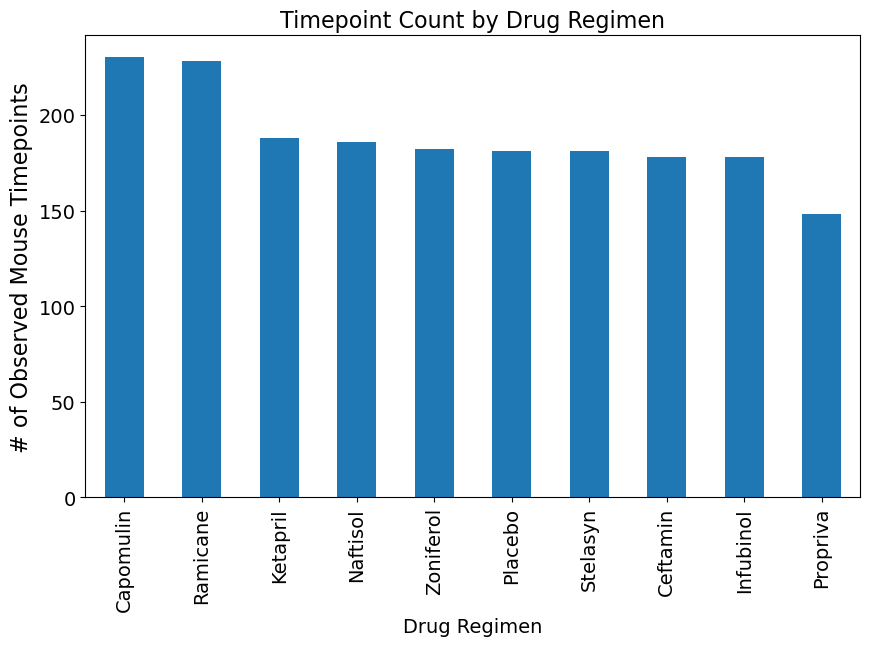

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_stat = df.groupby('Drug Regimen')['Timepoint'].count()
bar_stat = bar_stat.sort_values(ascending=False)
bar_stat.plot(kind='bar',figsize=(10, 6), fontsize=14)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=16)
plt.title('Timepoint Count by Drug Regimen', fontsize=16)
plt.show()

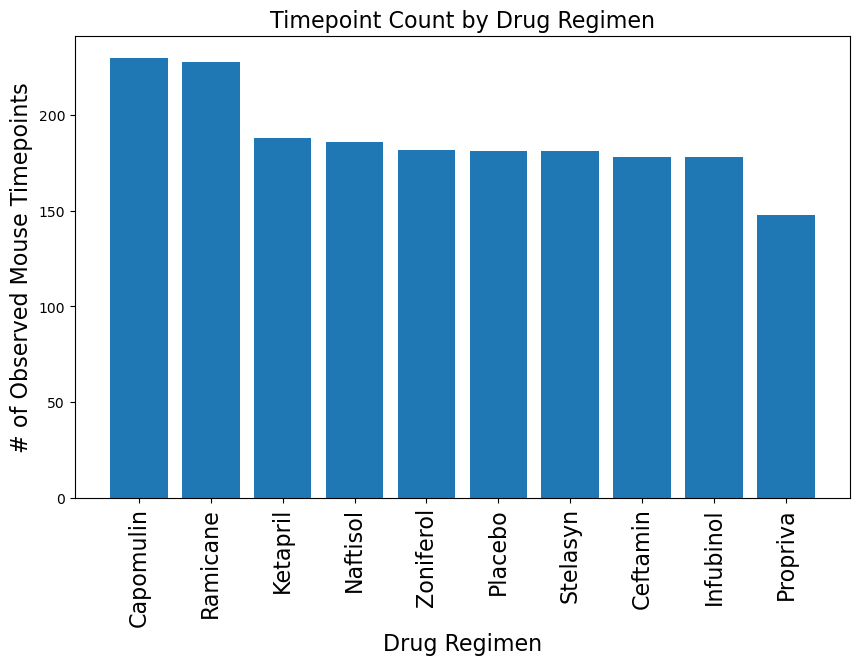

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(bar_stat.index, bar_stat.values)
plt.xlabel('Drug Regimen', fontsize=16)
plt.ylabel('# of Observed Mouse Timepoints',fontsize=16)
plt.title('Timepoint Count by Drug Regimen', fontsize=16)
plt.xticks(rotation = 90, fontsize=16)
plt.show()

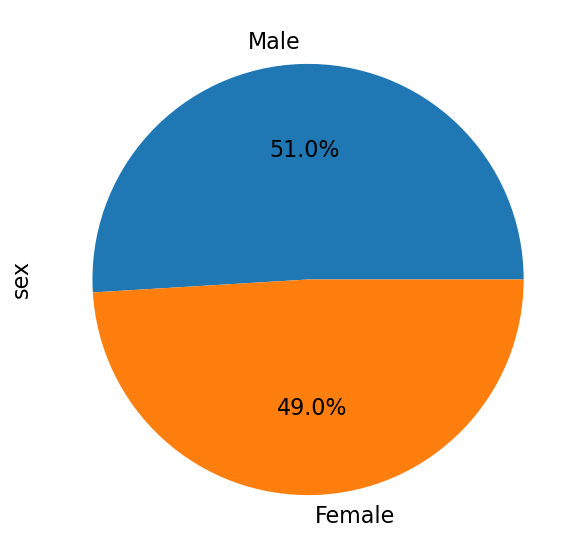

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = df['Sex'].value_counts()
pie_chart.plot(kind = 'pie', autopct='%1.1f%%', figsize=(7, 7),fontsize=16)
plt.ylabel('sex',fontsize=16)
plt.show()

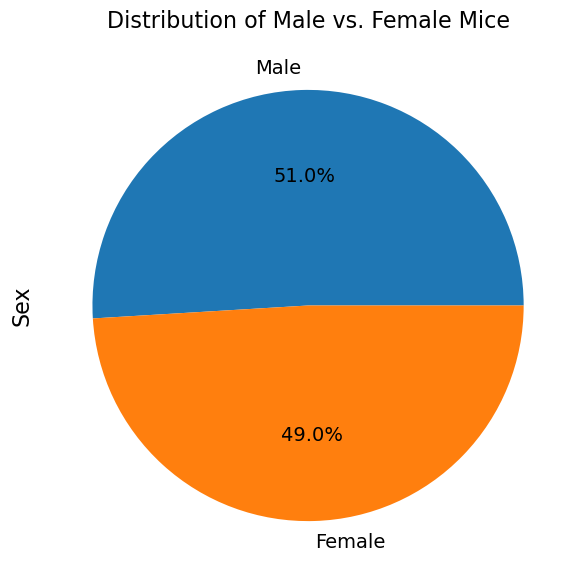

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
labels = ['Male', 'Female']
plt.figure(figsize=(7, 7))
plt.pie(pie_chart, autopct='%1.1f%%', labels=labels, textprops={'fontsize': 14})
plt.title('Distribution of Male vs. Female Mice', fontsize=16)
plt.ylabel("Sex", fontsize=16)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = df.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data = pd.merge(df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
for treatment in treatments:
    treatment_data = df[df['Drug Regimen'] == treatment]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    potential_outliers = treatment_data[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    tumor_volume_data.append(tumor_volumes)
    
    print(f"{treatment} potential outliers:")
    print(potential_outliers)
    print()


Capomulin potential outliers:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1652     s185         40           25.472143                 1    Capomulin   
1849     s185         45           23.343598                 1    Capomulin   

         Sex  Age_months  Weight (g)  
1652  Female           3          17  
1849  Female           3          17  

Ramicane potential outliers:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1814     k403         45           22.050126                 1     Ramicane   

       Sex  Age_months  Weight (g)  
1814  Male          21          16  

Infubinol potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Ceftamin potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []



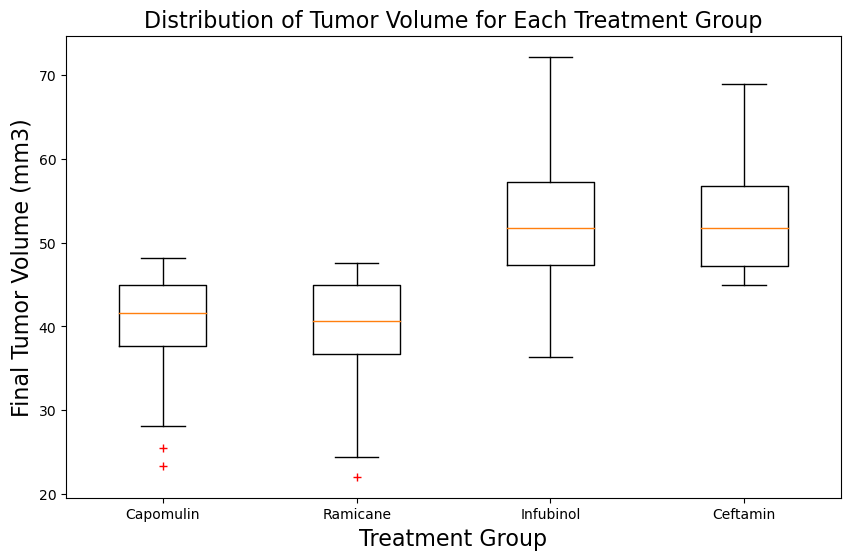

In [15]:

labels = treatments  # treatments list from the previous answer

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=labels, sym='r+')

# Set labels and title with font size 16
plt.xlabel('Treatment Group', fontsize=16)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=16)
plt.title('Distribution of Tumor Volume for Each Treatment Group', fontsize=16)

# Show the box plot
plt.show()


In [89]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

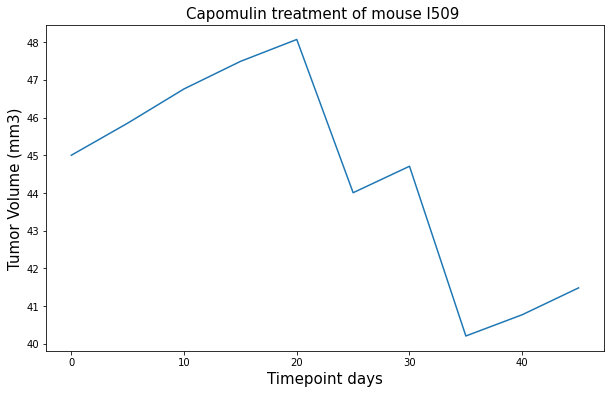

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'  

# Step 2: Filter the data for the selected mouse and Capomulin treatment
capomulin_data = df[(df['Mouse ID'] == mouse_id) & (df['Drug Regimen'] == 'Capomulin')]

# Step 3: Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mouse {mouse_id} ', fontsize = 15)
plt.xlabel('Timepoint days', fontsize = 15)
plt.ylabel('Tumor Volume (mm3)',fontsize = 15)
# Show the line plot
plt.show()


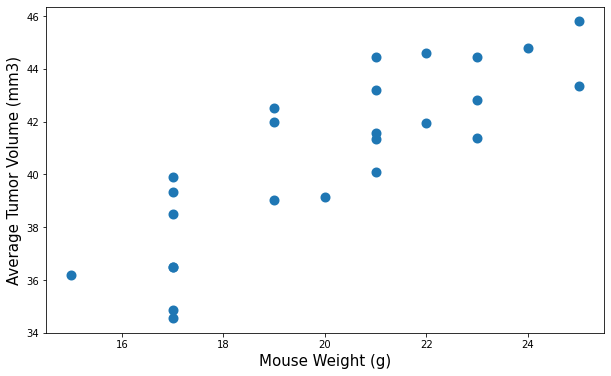

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = df[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_mouse_weight = df[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, linewidth=4)
plt.xlabel('Mouse Weight (g)', fontsize = 15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 15)

plt.show()

## Correlation and Regression

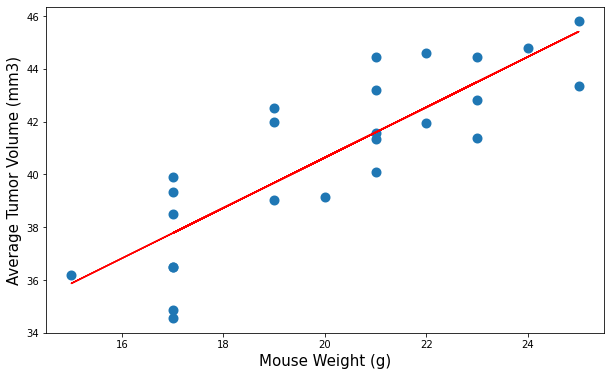

In [97]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_volume, linewidth=4)
plt.xlabel('Mouse Weight (g)', fontsize = 15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 15)
correlation_coefficient = capomulin_mouse_weight.corr(capomulin_avg_tumor_volume)
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weight, capomulin_avg_tumor_volume)
plt.plot(capomulin_mouse_weight, slope * capomulin_mouse_weight + intercept, color='red')

plt.show()